## Código para la Distribución Binomial 
J. Orozco


### Se pretende replicar la función binomial junto con
### PMF (Probability Mass Function), dada por: 
$P(X=k) = \binom{n}{k} \, p^k \, (1-p)^{n-k}$

### donde 
$\binom{n}{k}=\frac{n!}{k!(n-k)!}$

### CMF (Cumulative Mass Function) 
$ P(X\leq k) = \sum_{i=0}^{k} \, \binom{n}{i} \, p^i \, (1-p)^{n-i}  $


In [1]:
# librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#Fac = lambda x: 1 if x == 0 or x == 1 else x * Fac(x - 1)

#Fac(5)

120

In [2]:
def factorial(n):
    
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1) 

factorial(5) 


120

In [3]:
def P(n, p,i): ## n intentos, p probabilidad de exito, i exito

    if i > n:
        return 0

    else:
        coef = factorial(n) / (factorial(i) * factorial(n - i))
        prob = coef * (p ** i) * (1-p) ** (n - i)
        
        return prob

P(5, 0.5, 3) 

0.3125

In [4]:
def pmf(n, p):  ## Tabla Distribucion Binomial
    
    prob = pd.Series()

    for j in range(n+1):
        f = P(n, p, j) # Calculo de la probabilidad de cada x
        prob[j] = f
    return prob

pmf(5, 0.5)

0    0.03125
1    0.15625
2    0.31250
3    0.31250
4    0.15625
5    0.03125
dtype: float64

In [5]:
def cdf(list): # CUMULATIVE DISTRIBUTION FUNCTION
    x = list ## lista de probabilidades
    cumulative = pd.Series(dtype=float)
    y=0
    for i in range(len(x)):
        #print(i)
        y += x[i]
        cumulative[i] = y
    return cumulative

cdf(pmf(5, 0.5))

0    0.03125
1    0.18750
2    0.50000
3    0.81250
4    0.96875
5    1.00000
dtype: float64

In [6]:
## Tabla Distribucion Binomial

def Tdb(n,p):
    x = pd.Series(range(n+1)) ## valores de x

    fx = pd.DataFrame({
        'x': x,
        'P(X=x)': pmf(n, p),
        'sumP(x)': cdf(pmf(n, p))
    })

    return print(fx.to_string(index=False))


Tdb(5, 0.5)

 x  P(X=x)  sumP(x)
 0 0.03125  0.03125
 1 0.15625  0.18750
 2 0.31250  0.50000
 3 0.31250  0.81250
 4 0.15625  0.96875
 5 0.03125  1.00000


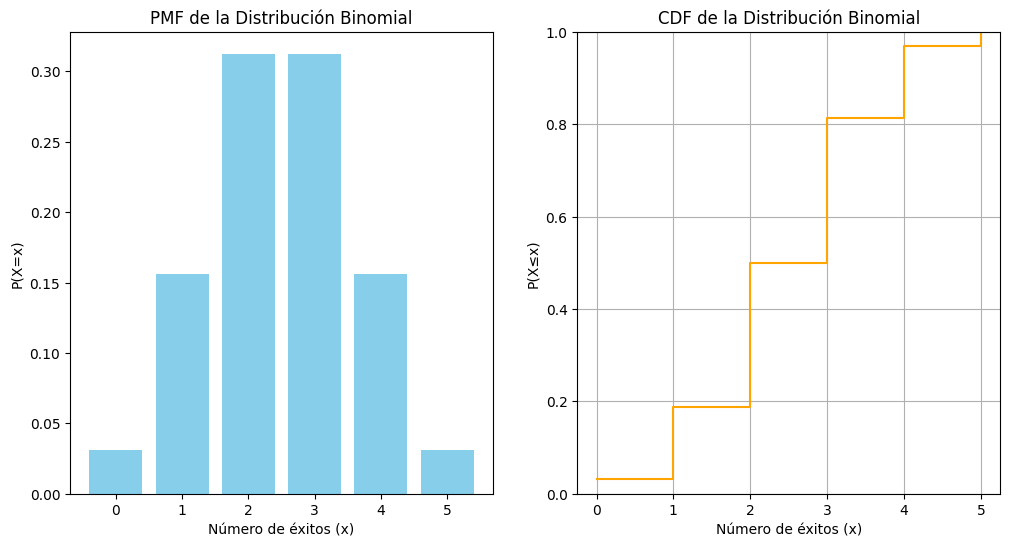

In [7]:
def plot_binomial(n, p):

    x = pd.Series(range(n+1))
    pm = pmf(n,p)
    cd = cdf(pm)   

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(x, pm, color='skyblue')
    plt.title('PMF de la Distribución Binomial')
    plt.xlabel('Número de éxitos (x)')
    plt.ylabel('P(X=x)')
    plt.subplot(1, 2, 2)
    plt.step(x, cd, where='post', color='orange')
    plt.title('CDF de la Distribución Binomial')
    plt.xlabel('Número de éxitos (x)')
    plt.ylabel('P(X≤x)')
    plt.ylim(0, 1)
    plt.grid()
    plt.show()

plot_binomial(5, 0.5)


 x  P(X=x)  sumP(x)
 0 0.03125  0.03125
 1 0.15625  0.18750
 2 0.31250  0.50000
 3 0.31250  0.81250
 4 0.15625  0.96875
 5 0.03125  1.00000


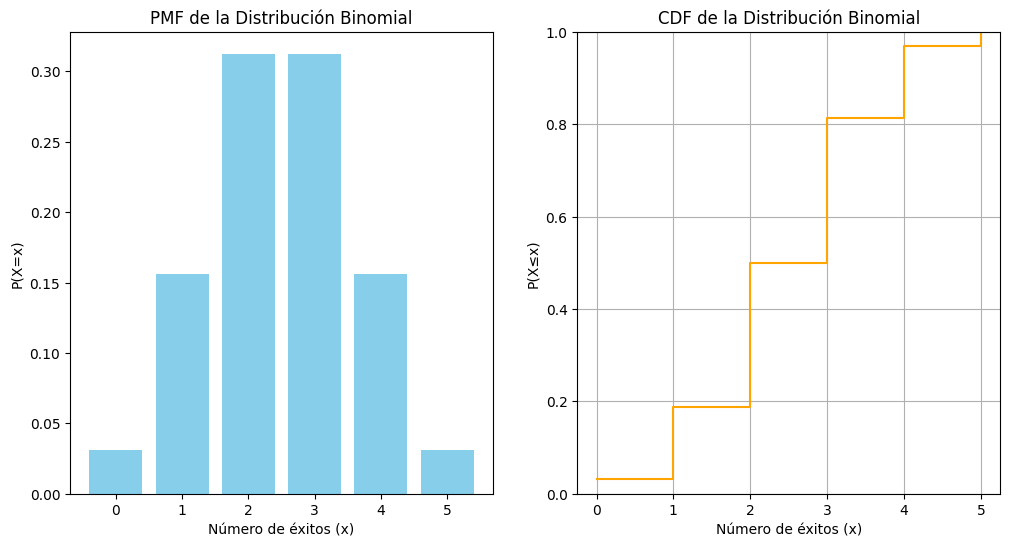

Tabla de Distribución Binomial y Gráfica generadas.


In [8]:
def Binomial_distribution(n,p):
    Tabla = Tdb(n,p)
    Grafica = plot_binomial(n,p)
    return print("Tabla de Distribución Binomial y Gráfica generadas.")
Binomial_distribution(5,0.5)

 x  P(X=x)  sumP(x)
 0 0.03125  0.03125
 1 0.15625  0.18750
 2 0.31250  0.50000
 3 0.31250  0.81250
 4 0.15625  0.96875
 5 0.03125  1.00000


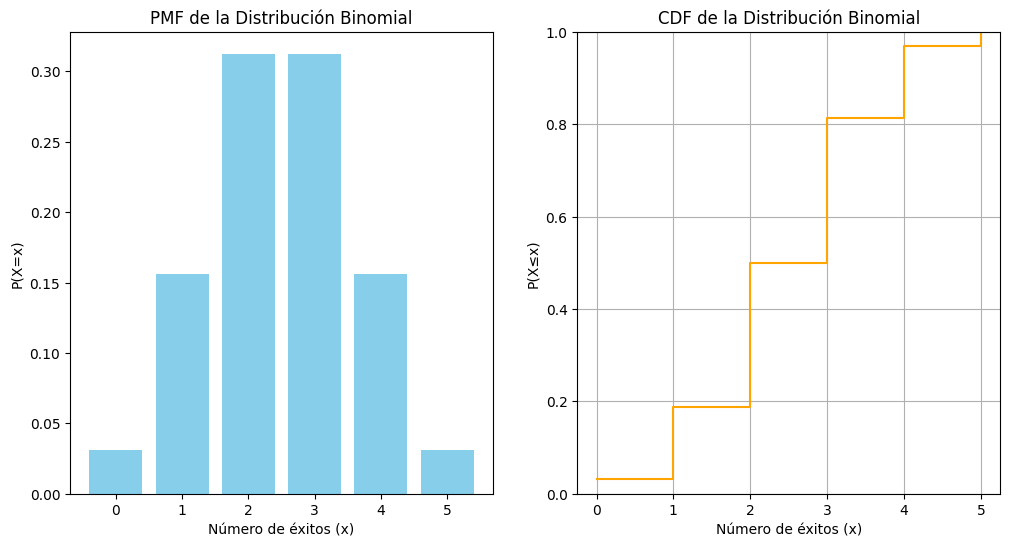

Tabla de Distribución Binomial y Gráfica generadas.


In [9]:
## Example
Binomial_distribution(5,0.5)